# Bank of Canada - Data and analytics specialist - written assessment



## Question A
### i) Download the Bitcoin price/volume/market cap data from this website: https://coinmarketcap.com/currencies/bitcoin/historical-data/ and reproduce the chart of Bitcoin to USD as shown in this link: https://coinmarketcap.com/currencies/bitcoin/. Be sure to include all three panels (Price, Market Cap, and Trading View); interactivity (hover, date expansion) is optional (extra 1 bonus point).


In [1]:
pip install mpl_finance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc


/opt/anaconda3/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
df_bitcoin = pd.read_csv(os.path.join(sys.path[0], 'bitcoindata.csv'))


In [4]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,04/26/2023,28300.06,29995.84,27324.55,28422.70,31854242019,5.500000e+11
1,04/25/2023,27514.87,28371.08,27207.93,28307.60,17733373139,5.480000e+11
2,04/24/2023,27591.73,27979.98,27070.85,27525.34,17703288330,5.330000e+11
3,04/23/2023,27816.14,27820.24,27400.31,27591.38,12785446832,5.340000e+11
4,04/22/2023,27265.90,27872.14,27169.57,27817.50,13125734602,5.380000e+11


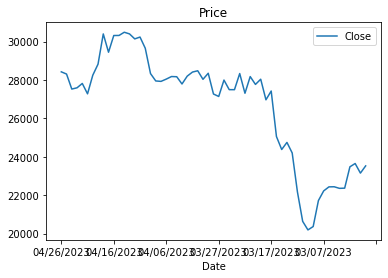

In [5]:
# price chart
df_bitcoin.plot(kind='line', x='Date', y='Close', title='Price')

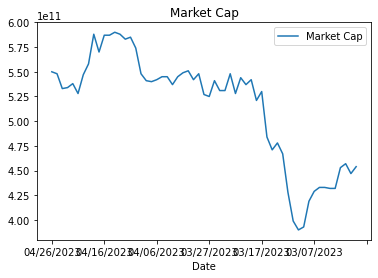

In [6]:
# market cap chart
df_bitcoin.plot(kind='line', x='Date', y='Market Cap', title='Market Cap')


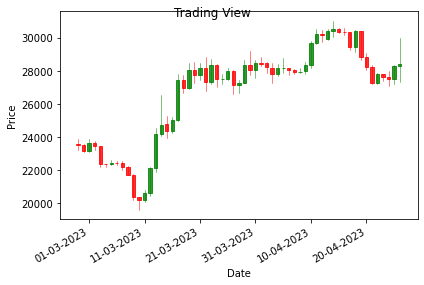

In [7]:
# candlestick chart 
ohlc = df_bitcoin.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Trading View')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

### v)	Using the same dataset and at least one additional data source of your choice, build any two visualizations using your choice of variables and complement them with notes and descriptions to explain why you have chosen these visualizations.

#### Explore correlation between Bitcoin and S&P500 index. Per sources this implies that Bitcoin has become neither 'digital gold' nor a 'safe-haven asset' in times of crisis.

#### Limitation with this analysis is only able to retrieve most recent month worth of data for SP500 whereas have more historical for Bitcoin




In [8]:
df_bitcoinapr = pd.read_csv(os.path.join(sys.path[0], 'bitcoindataapril.csv'))
df_sp = pd.read_csv(os.path.join(sys.path[0], 'sp500.csv'))

In [9]:
df_sp.head()

,Date,Open,High,Low,Close
0,04/26/2023,4087.78,4089.67,4049.35,4055.99
1,04/25/2023,4126.43,4126.43,4071.38,4071.63
2,04/24/2023,4132.07,4142.41,4117.77,4137.04
3,04/21/2023,4132.14,4138.02,4113.86,4133.52
4,04/20/2023,4130.48,4148.57,4114.57,4129.79


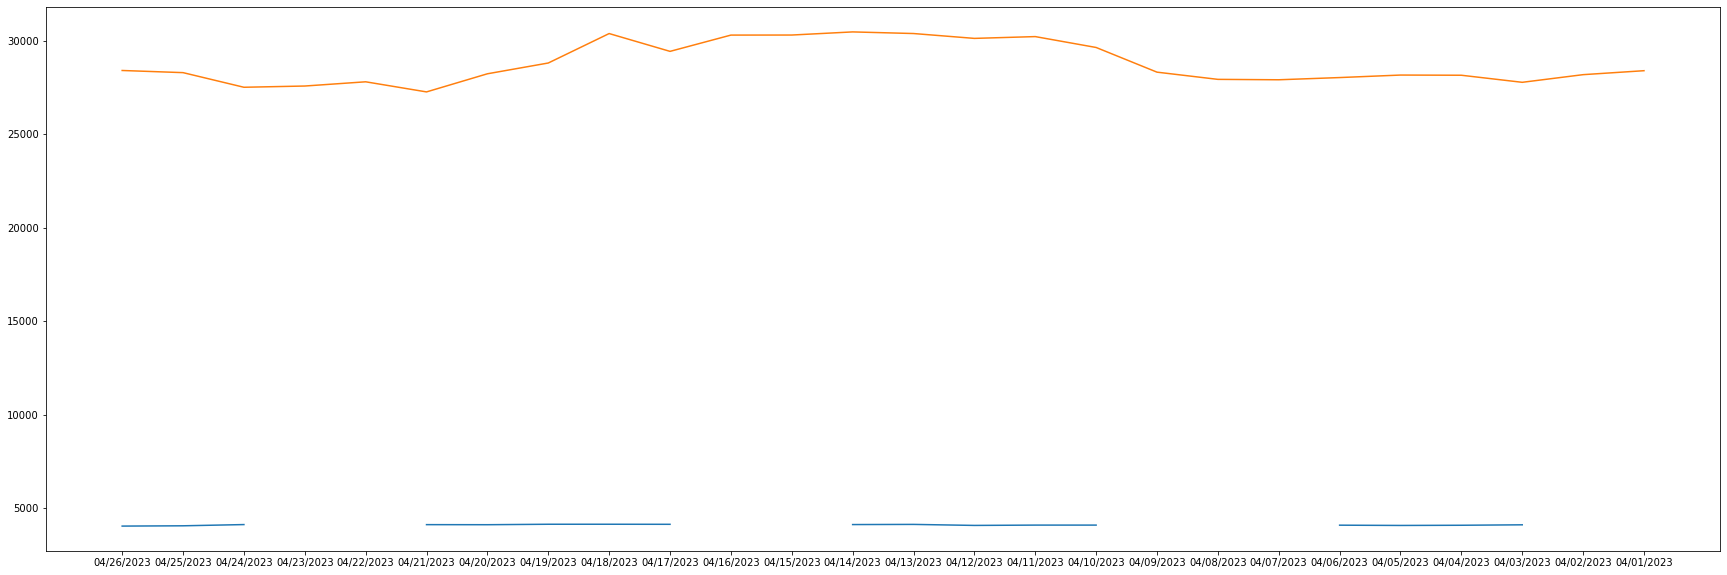

In [10]:
#plt.plot(df_bitcoin.Date, df.bitcoin.Close)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(df_bitcoinapr.Date, df_bitcoinapr.SPClose)
plt.plot(df_bitcoinapr.Date, df_bitcoinapr.Close)
plt.show()

#### timeseries analysis with facebook prophet to predict next 60 days price bitcoin

In [11]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [12]:
datap = df_bitcoin.reset_index()

In [13]:
# Select only the important features i.e. the date and price
datap = datap[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
datap = datap.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
datap.head(5)

,ds,y
0,04/26/2023,28422.70
1,04/25/2023,28307.60
2,04/24/2023,27525.34
3,04/23/2023,27591.38
4,04/22/2023,27817.50


In [14]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(datap) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


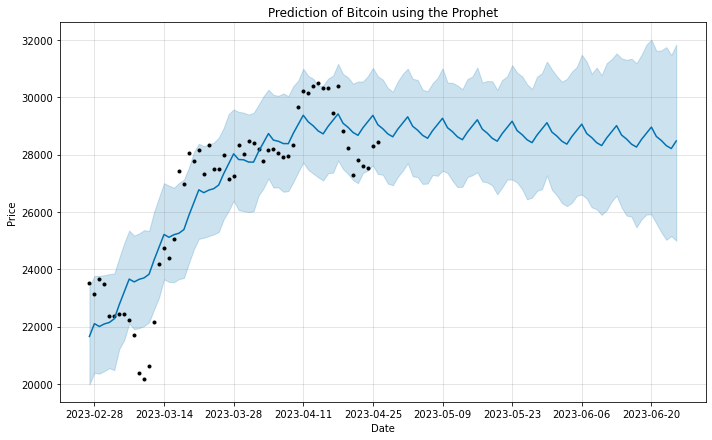

In [15]:
future = m.make_future_dataframe(periods=60) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Question B


### i)	Clean the dataset found in the csv file, including interpolating missing datapoints. Please include a short explanation (maximum 50 words) of how you cleaned the data set.

In [16]:
df_unrate = pd.read_csv(os.path.join(sys.path[0], 'unrate.csv'))


In [17]:
df_unrate.head()

,DATE,UNRATE
0,01/01/2001,4.2
1,01/02/2001,4.2
2,01/03/2001,4.3
3,01/04/2001,4.4
4,01/05/2001,4.3


In [18]:
# plot 3 individual years to get feel for the linear


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


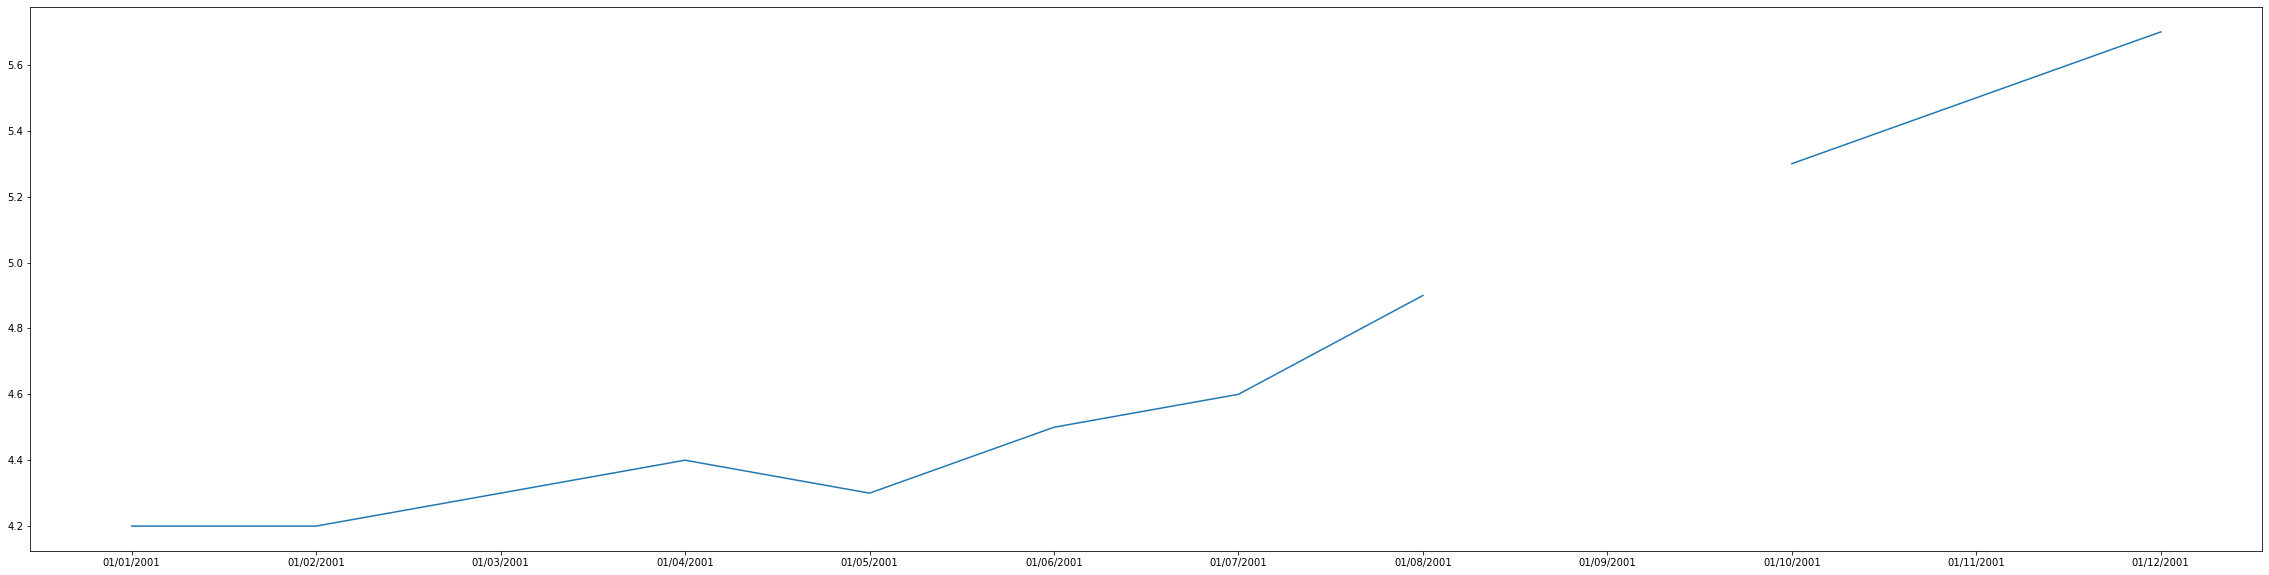

In [19]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)  
  
plt.plot(df_unrate.iloc[:12].DATE, df_unrate.iloc[:12].UNRATE)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


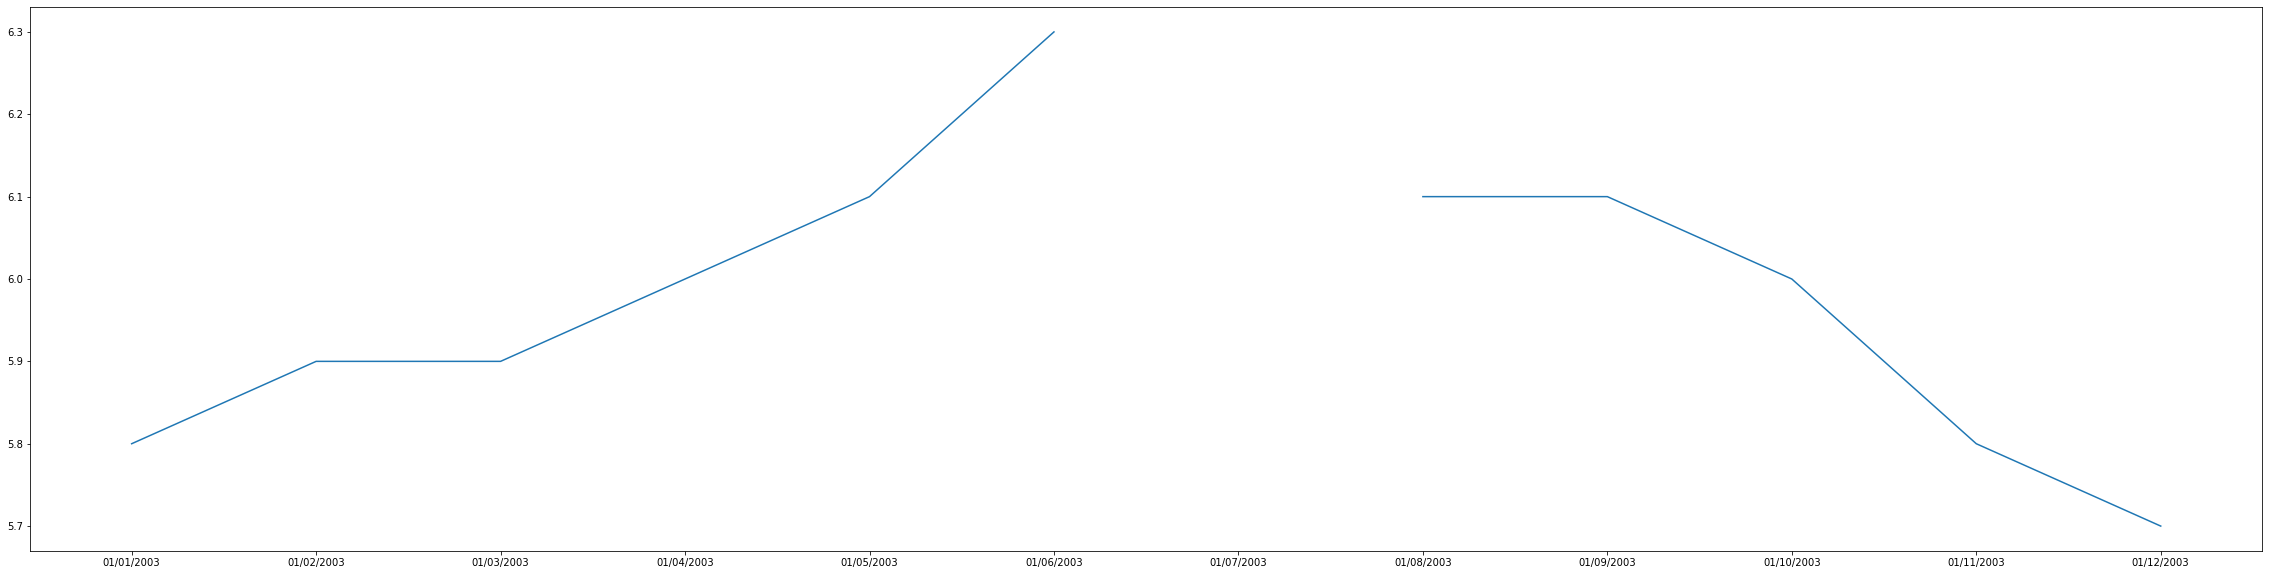

In [20]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)  
  
plt.plot(df_unrate.iloc[24:36].DATE, df_unrate.iloc[24:36].UNRATE)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


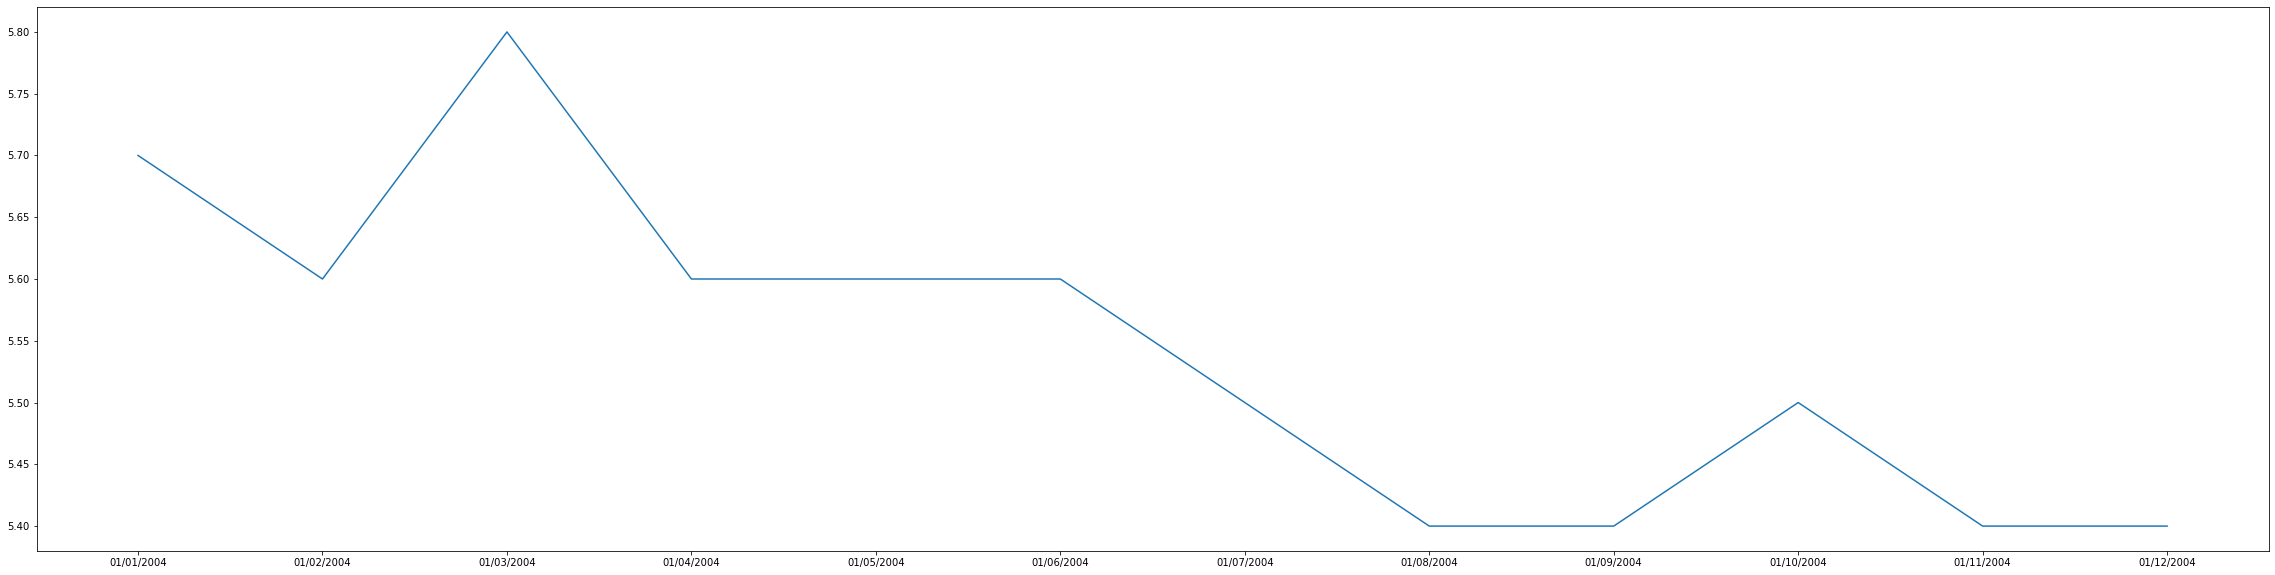

In [21]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)  
  
plt.plot(df_unrate.iloc[36:48].DATE, df_unrate.iloc[36:48].UNRATE)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


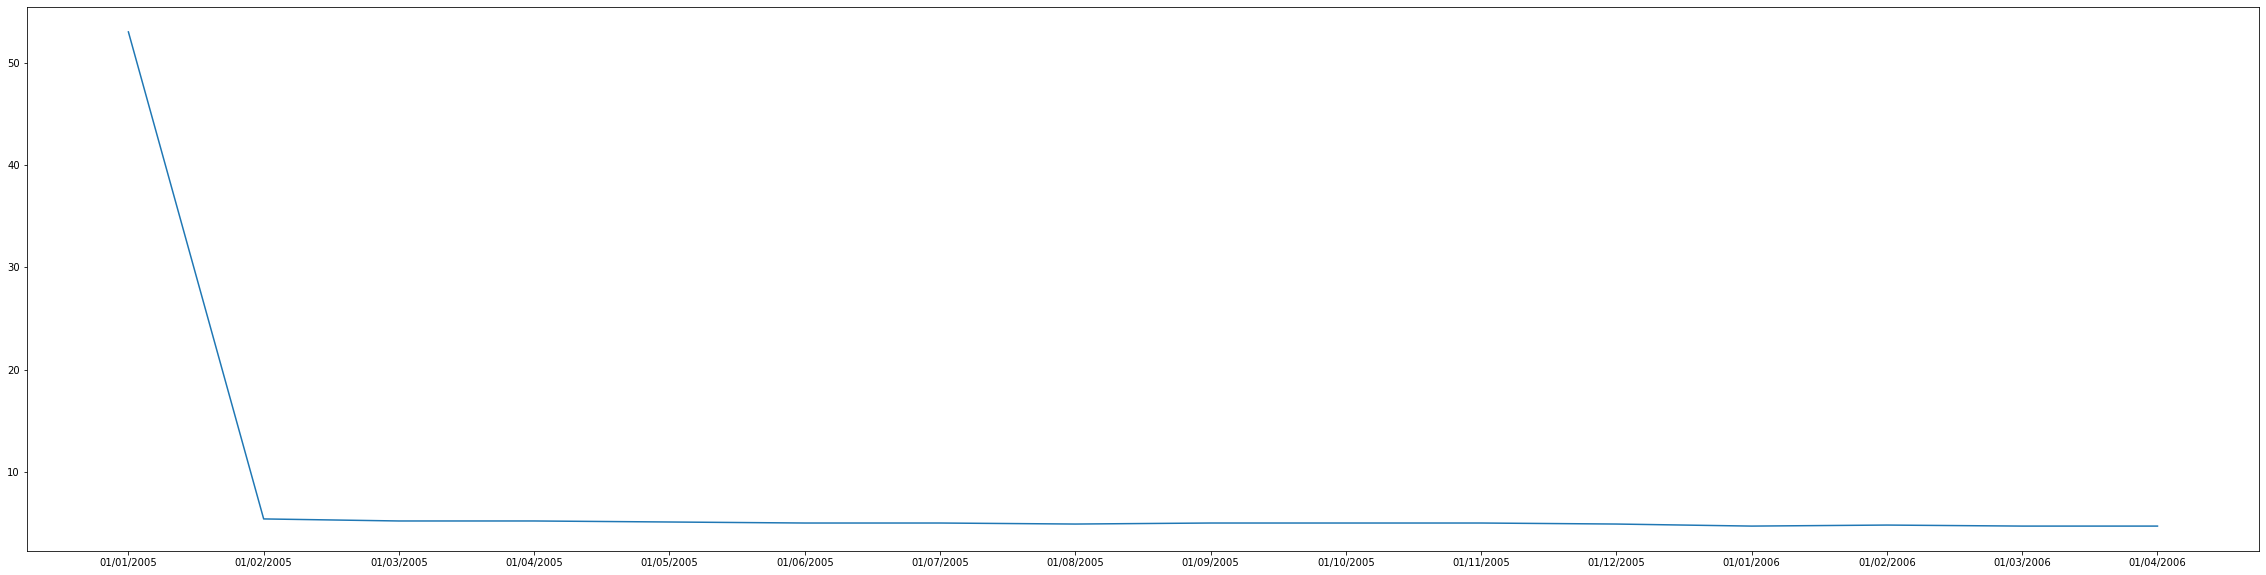

In [22]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)  
  
plt.plot(df_unrate.iloc[48:64].DATE, df_unrate.iloc[48:64].UNRATE)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


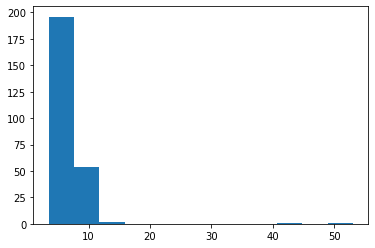

In [23]:
#histogram to get idea of distrbution
plt.hist(df_unrate.UNRATE, bins=12)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


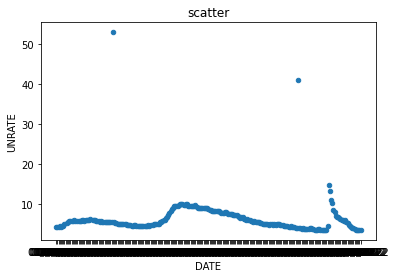

In [24]:
#scatterplot to identify outliers
df_unrate.plot(kind='scatter', x='DATE', y='UNRATE', title='scatter')


In [25]:
#load imputed values for unrate
df_unrate_rev = pd.read_csv(os.path.join(sys.path[0], 'unrate_rev.csv'))


### ii)	Create one table of the following summary statistics for the unemployment rate of the US: Mean, Standard Deviation, 25th Percentile, 50th Percentile, 75th Percentile, and Max. 

In [26]:
import numpy as np  
np.percentile(df_unrate_rev.UNRATE, q=[0, 25, 50, 75, 100])  

array([ 3.5 ,  4.6 ,  5.5 ,  7.05, 14.7 ])

In [27]:
df_unrate_rev.describe()

,UNRATE
count,259.000000
mean,5.988803
std,1.952039
min,3.500000
25%,4.600000
50%,5.500000
75%,7.050000
max,14.700000
